# Final Project Notebook 

Our group, when initially discussing the criteria for determining the best Pittsburgh neighborhood to live in, focused on identifying an area conducive to raising a family. We decided to evaluate the suitability of a neighborhood for family life based on considerations such as schools, safety, and the environment. 

 ### Metric One: Enviroment 

To assess the environment, I reflected on what I valued in my upbringing—particularly the presence of a playground right behind my house.



Conducting research on how playgrounds contribute to a positive family environment, I discovered that they often function as community gathering places. These spaces foster a sense of community by encouraging social interactions among parents and children. Positive living conditions are further enriched by these social connections. In addition to the social benefits, playgrounds offer children a dedicated space for play and physical activity, contributing to their overall health and well-being.

Recognizing the significance of easily accessible recreational areas for families with small children, we concluded that playgrounds serve as a valuable indicator of the importance of such spaces in neighborhoods.

The data set that I am using is from the western pennsylvania regional data center called City of Pittsburgh Playgrounds.  

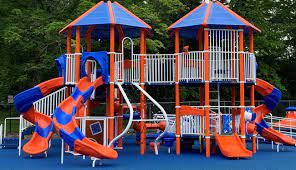 

#### Collecting and Organizing the Data

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

playground = pd.read_csv("PlaygroundData.csv", sep=",")

playground.sort_values(by=['neighborhood'])
num_playground= pd.DataFrame(playground["neighborhood"].value_counts().sort_values(ascending=False))

In [5]:
num_playground

,neighborhood
Squirrel Hill South,8
South Side Slopes,5
Beechview,5
Highland Park,4
Sheraden,4
...,...
Shadyside,1
Polish Hill,1
Fineview,1
Terrace Village,1


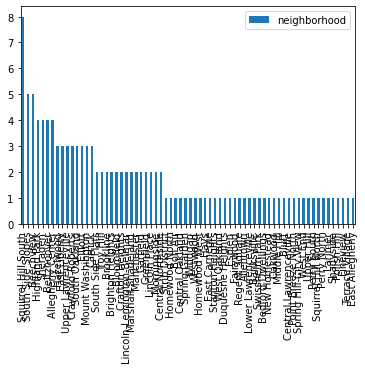

In [6]:
bargraph = num_playground.plot.bar()

I then created a bar graph out of this new data set but realized a lot of neighborhoods only had 1 playground. So then I used a query mask to create a new set of data that only included neighborhood that had more than one playground.

In [7]:
query_mask = num_playground['neighborhood'] > 1
many_playgrounds = num_playground[query_mask]
many_playgrounds.head()

,neighborhood
Squirrel Hill South,8
South Side Slopes,5
Beechview,5
Highland Park,4
Sheraden,4


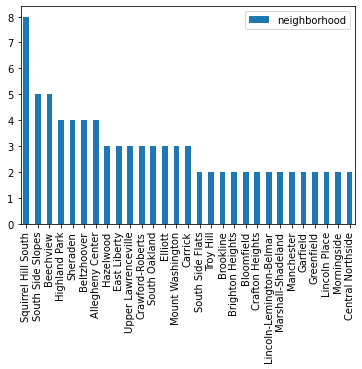

In [8]:
bargraph = many_playgrounds.plot.bar()

After creating this new data set I re made the bar graph with this new information which made the bar graph way easier to read and therefore I was able to come to the conclusion that if we only look that this one set of data Squirrel Hill South would be the best place to raise a family. 

Y-Value: Number of Playgrounds 
X-VAlue: Neighborhood

When looking at a map of all the neighborhoods in Pittsburgh it does make sense that Squirrel Hill South has the most playground beacuse it is the biggest neighborhood. However I did not decied to factor in size of neighborhood beacuse we did not factor in populaition into any of our other metrics and besides Squirrel Hill South all the other neighborhoods are of simmilar size. 

### Metric Two: Safety
The metric I chose to help determine the best neighborhood to raise a family in was safety. When deciding which metrics we thought would be good indicators of the best neighborhood, safety was something we all thought could make or break a neighborhood to raise a family in. 

To measure the safety of the Pittsburgh neighborhoods, I chose the dataset titled "Police Incident Blotter (30 Day)." I chose this because I liked how it provided so much detail, like the crime reported, the neighborhood the crime was reported in, what time, etc. To determine the safest neighborhood, I will choose the neighborhood with the least crime reports during the period of Oct. 18th to Nov 8th. 

#### Collecting and Organizing Data
I first read in the data and printed the first 10 values.

In [1]:
import pandas as pd
data = pd.read_csv("Police-Blotter.csv", sep=',')
data.head(10)

,_id,PK,CCR,HIERARCHY,INCIDENTTIME,INCIDENTLOCATION,CLEAREDFLAG,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTHIERARCHYDESC,OFFENSES,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,3160200,322852487,23160391,18,2023-10-09T02:51:00,"900 Block Cherokee Rdwy Pittsburgh, PA 15219",Y,Upper Hill,2,STOLEN PROPERTY - OTHER,13(a)(16) Possession of Controlled Substance,506.0,NaN,NaN,NaN,NaN
1,3160201,322852762,23160392,10,2023-10-09T02:25:00,"2500 Block Chauncey Dr Pittsburgh, PA 15219",Y,Bedford Dwellings,2,HARRASSMENT/THREAT/ATTEMPT/PHY,"2709(a)(1) Harassment by Physical Contact, or ...",509.0,6.0,3.0,-79.973840,40.450983
2,3160202,322852787,23160384,4,2023-10-09T01:40:00,"Station St & Centre Ave Pittsburgh, PA",Y,East Liberty,5,AGG-ASSAULT,2702 Aggravated Assault. / 3925 Receiving Stol...,1113.0,9.0,2.0,-79.921301,40.462879
3,3160203,322893569,23160534,6,2023-10-09T07:00:00,"200 Block Hallock St Pittsburgh, PA 15211",N,Duquesne Heights,3,THEFT FROM AUTO,3934 Theft from Vehicle,1911.0,2.0,5.0,-80.017997,40.434786
4,3160204,322917429,23160673,10,2023-10-09T16:30:00,"100 Block Frustum St Pittsburgh, PA 15204",N,Esplen,6,SIMPLE ASSAULT,2701 Simple Assault.,2017.0,NaN,NaN,NaN,NaN
5,3160205,324235775,23171535,27,2023-10-28T05:00:00,"7200 Block Monticello St Pittsburgh, PA 15208",N,Homewood North,5,HIT AND RUN,3745 Accidents Involving Damage to Unattended ...,1302.0,9.0,2.0,-79.895444,40.459513
6,3160206,324798988,23176386,10,2023-11-06T10:30:00,"100 Block Ruth St Pittsburgh, PA 15211",Y,Mount Washington,3,HARRASSMENT/THREAT/ATTEMPT/PHY,"2709(a)(1) Harassment by Physical Contact, or ...",1807.0,2.0,5.0,-80.005232,40.423791
7,3160207,324799806,23176355,0,2023-11-06T11:00:00,"7300 Block Hamilton Ave Pittsburgh, PA 15208",Y,Homewood South,5,99,4524 Windshield Obstructions and Wipers. / 627...,1303.0,9.0,2.0,-79.895648,40.454024
8,3160208,324806932,23176425,6,2023-11-05T22:30:00,"700 Block Penn Ave Pittsburgh, PA 15219",N,Central Business District,2,THEFT,3921(a) Theft by Unlawful Taking or Dispositio...,201.0,NaN,NaN,-79.884672,40.443511
9,3160209,324810215,23176417,99,2023-11-06T12:51:00,"7000 Block Kelly St Pittsburgh, PA 15208",N,Homewood South,5,MISSING PERSONS (18+),9490 Missing Persons (18 and Over),1303.0,9.0,2.0,-79.901815,40.456612


I then decided to print the amount of offenses, but that did not prove to be very helpful. 

In [2]:
data['OFFENSES'].value_counts()

9999 9999 - (Misc. Incident):                                                                                                                                                                                       105
3921(a) Theft by Unlawful Taking or Disposition - Movable item                                                                                                                                                       94
3745 Accidents Involving Damage to Unattended Veh.or Prop.                                                                                                                                                           89
3304 Criminal Mischief.                                                                                                                                                                                              85
3921 Theft by Unlawful Taking or Disposition.                                                                                           

I proceeded to make a dataframe with only the neighborhood and the crime reported, but that again didn't provide much useful information. 

In [3]:
data = data[["INCIDENTNEIGHBORHOOD", "INCIDENTHIERARCHYDESC"]]
df = pd.DataFrame(data)
df

,INCIDENTNEIGHBORHOOD,INCIDENTHIERARCHYDESC
0,Upper Hill,STOLEN PROPERTY - OTHER
1,Bedford Dwellings,HARRASSMENT/THREAT/ATTEMPT/PHY
2,East Liberty,AGG-ASSAULT
3,Duquesne Heights,THEFT FROM AUTO
4,Esplen,SIMPLE ASSAULT
...,...,...
1995,Garfield,SIMPLE ASSAULT
1996,East Hills,99
1997,Central Business District,TAMPER WITH/FAB PHYS EVIDENCE
1998,California-Kirkbride,99


I created a dataframe of the number of crimes that happened per neighborhood, which finally gave the data I wanted.

In [4]:
df = df['INCIDENTNEIGHBORHOOD'].value_counts().sort_values(ascending=True)
df.head(100)

New Homestead                  1
Windgap                        1
Mount Oliver                   1
Chartiers City                 2
Ridgemont                      2
                            ... 
Crawford-Roberts              50
Shadyside                     57
Carrick                       58
South Side Flats             120
Central Business District    186
Name: INCIDENTNEIGHBORHOOD, Length: 90, dtype: int64

I then plotted the data as a bar chart, but this made the graph very hard to read. Since I’m deciding the best neighborhood based on least amount of crimes, it made sense to only show those with a crime amount less than 10.

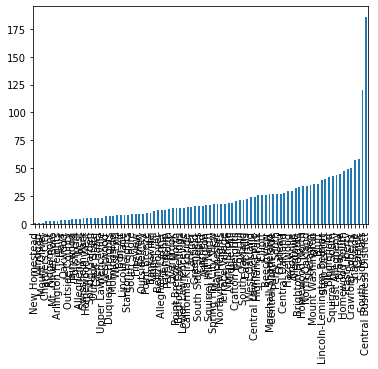

In [6]:
df.plot(kind = "bar")

This was my first attempt to only show neighborhoods with 10 or less crime reports. To do so, I tried to change the ylim to go from 0 to 10, but that didn’t give the result I wanted. 

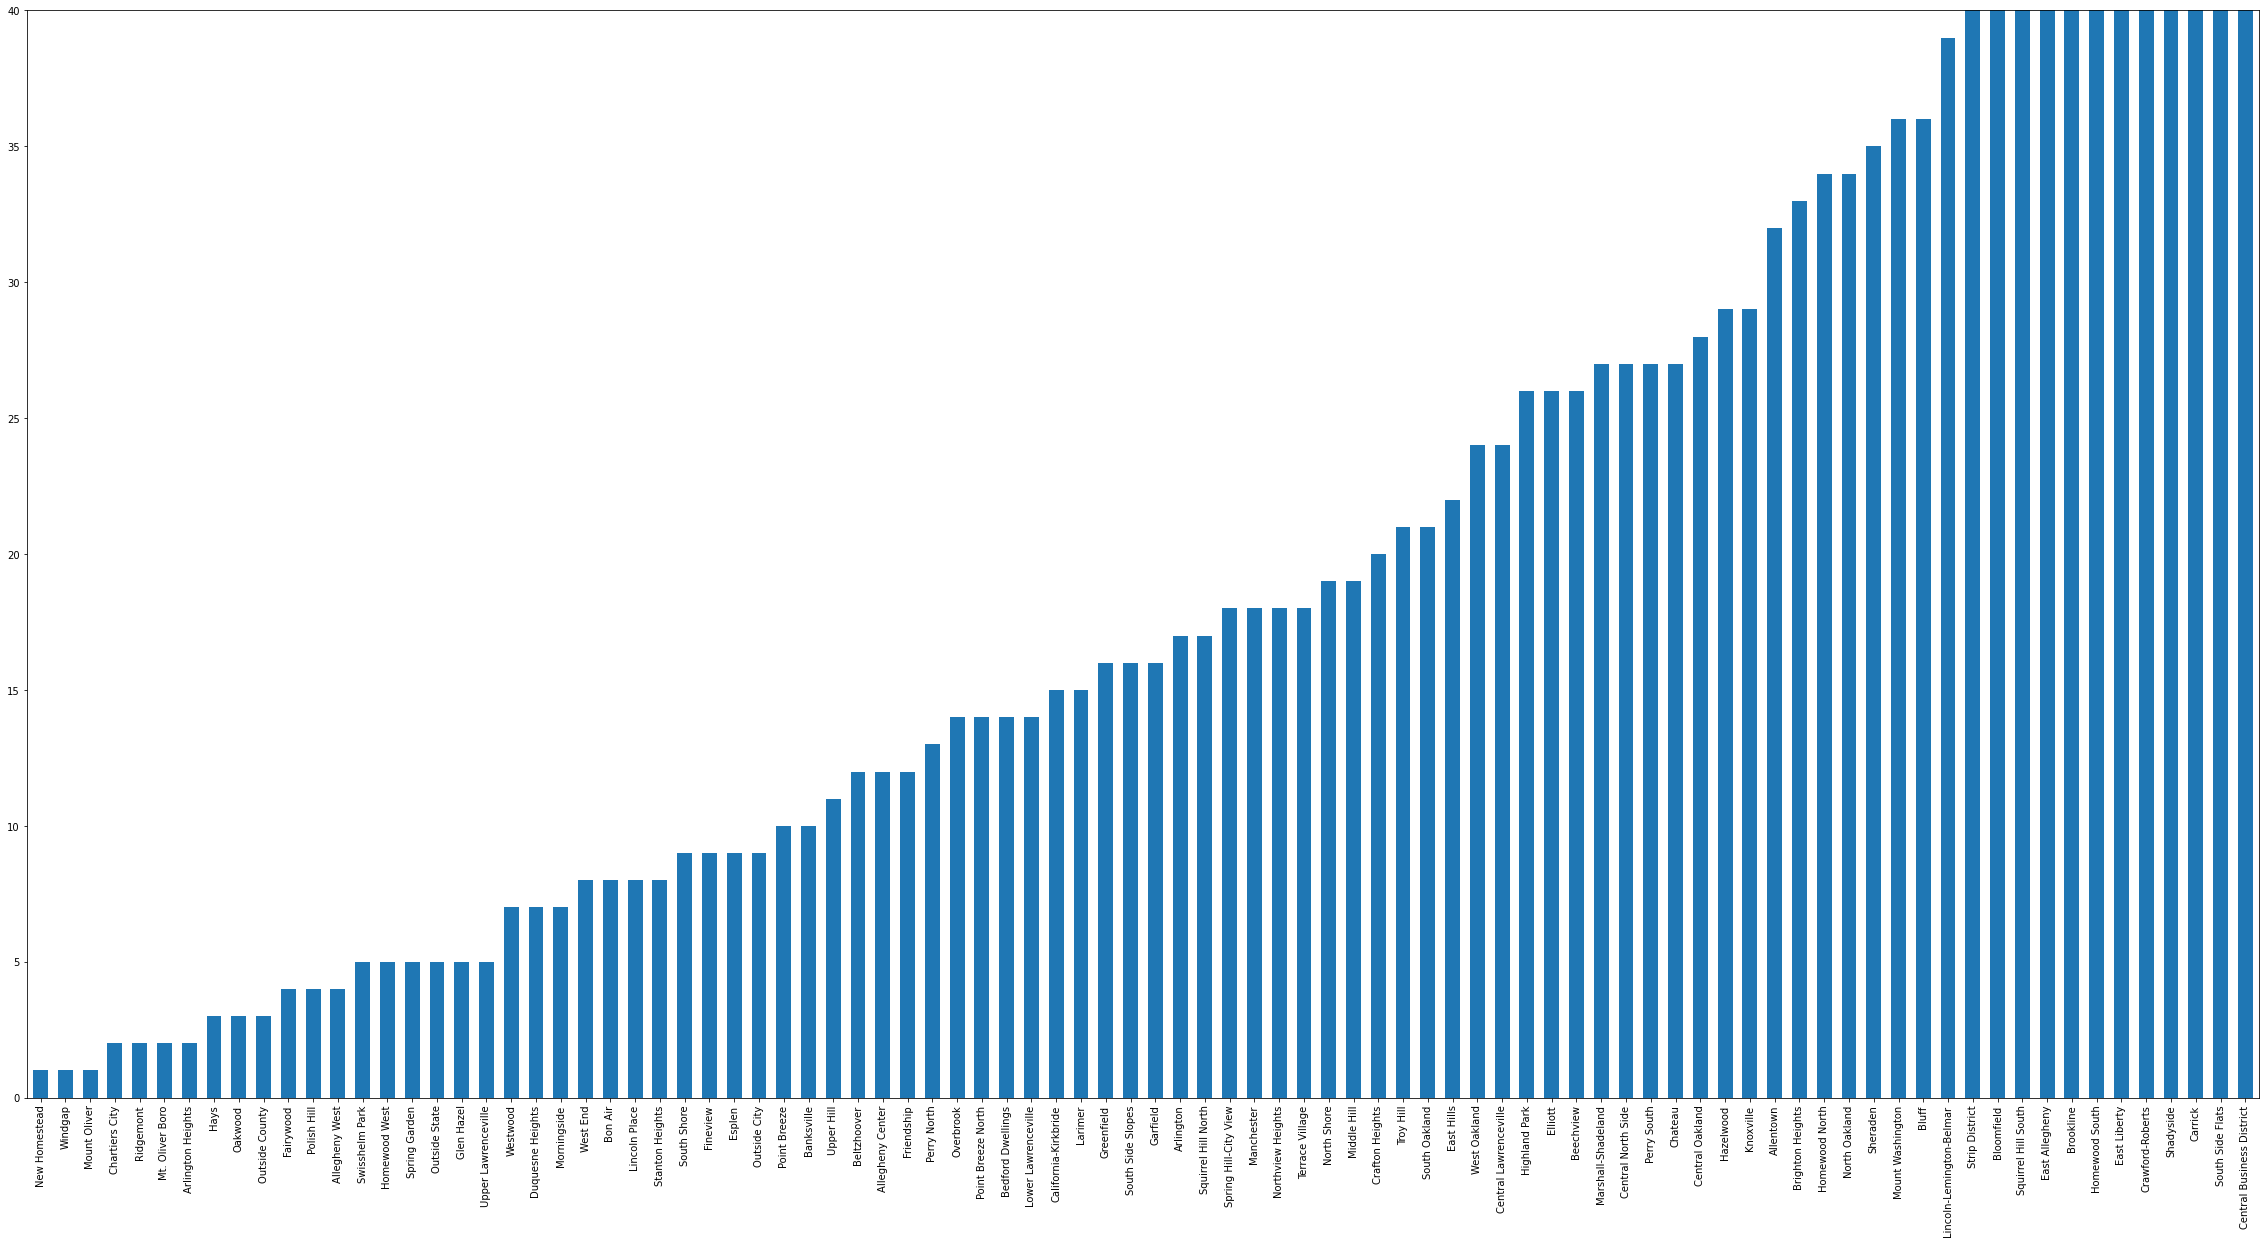

In [7]:
df.plot(kind = "bar", width = .6, figsize =(40, 20), ylim = (0, 40))

I was able to make a horizontal bar chart with my desired range that made the data much easier to read.

Text(0, 0.5, 'Neighborhood')

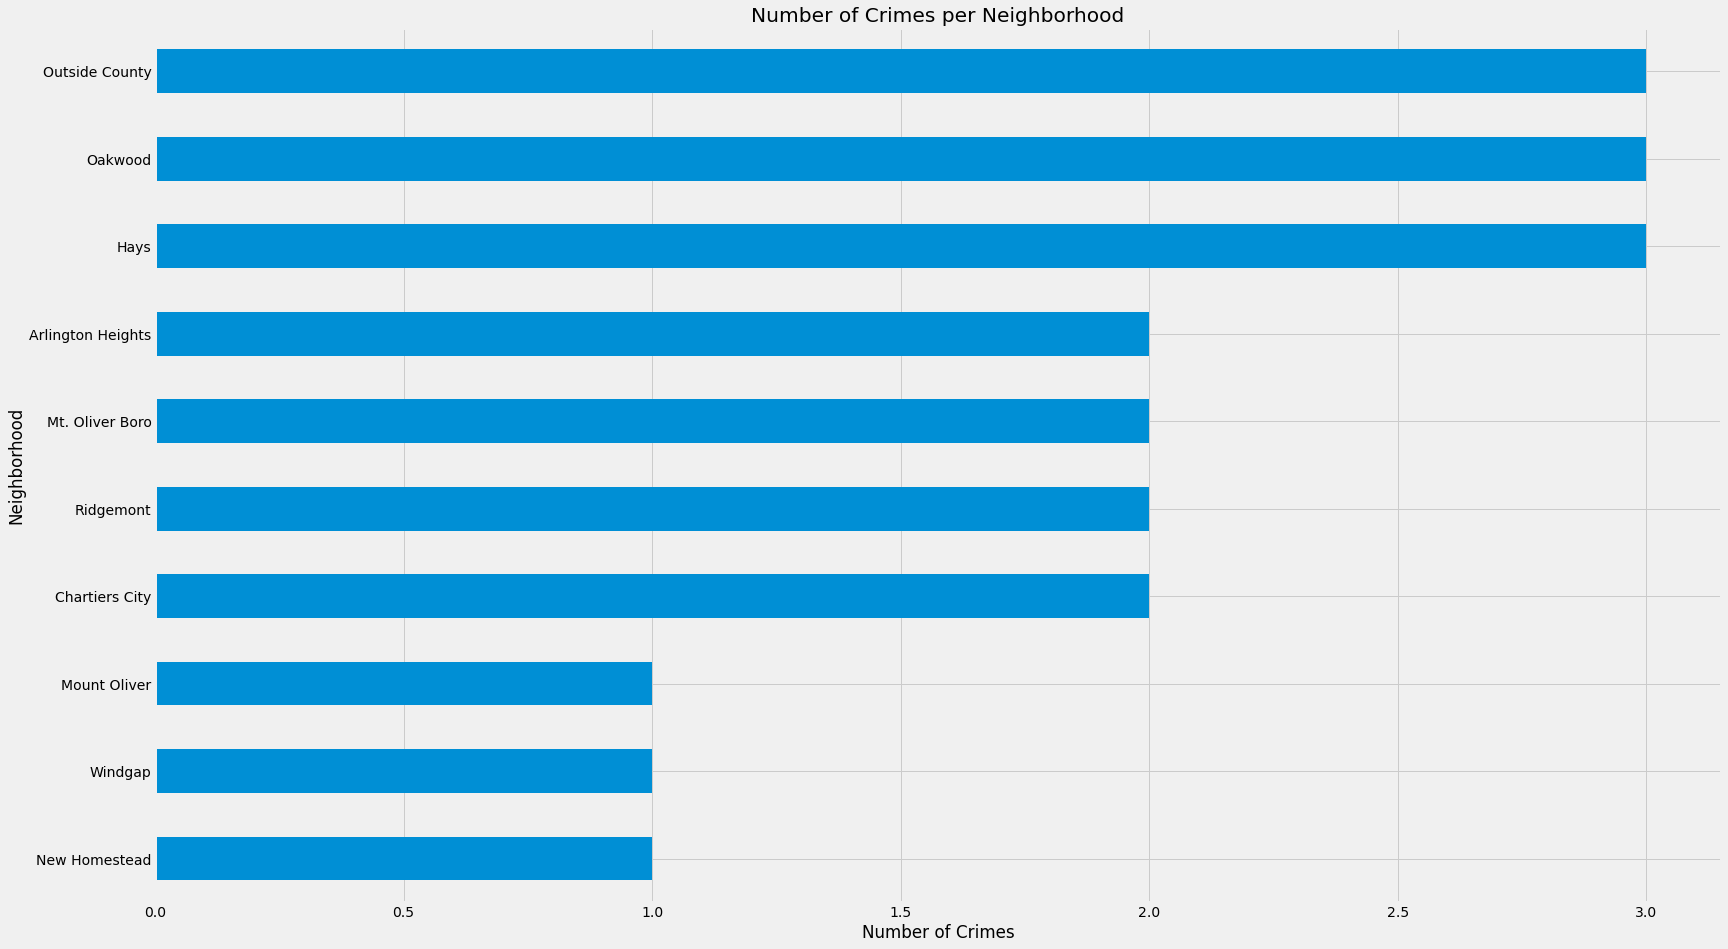

In [8]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('fivethirtyeight')
df[0:10].plot.barh(x = "Neighborhood", y = "runaways",figsize=(25,15))
plt.title("Number of Crimes per Neighborhood")
plt.xlabel("Number of Crimes")
plt.ylabel("Neighborhood")

#### Results: Top Three Neighborhoods
1. New Homestead
2. Windgap
3. Mount Oliver

### Metric Three: Education

I decided to also measure the best neighborhood through education. More specifically, education is one of the most important factors, which contributes to famillies' decisions to move to specific areas. 

The data set shown below is from the Western Pennsylvania Regional Data Center, and it is titled: Pittsburgh Public Schools Enrollment by Neighborhood, School, and Feeder Pattern
It includes each neighborhoods in Pittsburgh, and the total number of students enrolled in school in that neighborhood. 


#### Collecting and Organizing Data

In [6]:
import pandas as pd
import matplotlib.pyplot as plt  

enrollment = pd.read_csv("EnrollmentByNeighborhood2020-2021.csv", sep= ",")

#Since I was only interested in the total number of students per school, I only kept two columns:
enrollment = enrollment[['neighborhood', 'total_students_enrolled']]

print(enrollment)

students = pd.DataFrame(enrollment['total_students_enrolled'])

            neighborhood  total_students_enrolled
0       Allegheny Center                      NaN
1         Allegheny West                      NaN
2              Allentown                      NaN
3              Arlington                      NaN
4      Arlington Heights                      NaN
..                   ...                      ...
355             West End                      NaN
356         West Oakland                     14.0
357             Westwood                     62.0
358  Wilkinsburg Borough                    194.0
359              Windgap                     31.0

[360 rows x 2 columns]


#### Using Query Mask:

I created a query mask to exclude schools which had a low number of total students enrolled. I decided to make the minimum number of students enrolled 200, because about 20 schools were shown on the bar graph with this query mask.

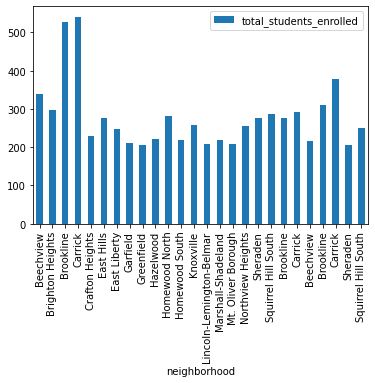

In [7]:
query_mask = students["total_students_enrolled"] > 200
schools = enrollment[query_mask]
schools.plot(x='neighborhood', y='total_students_enrolled', kind='bar')

Then, in order to see the top three schools, I created a new quey mask where the limit to the number of students enrolled was 300. This allowed me to see a fewer number of neighborhoods, and draw a conclusion on which neghborhood was best in the education aspect. 

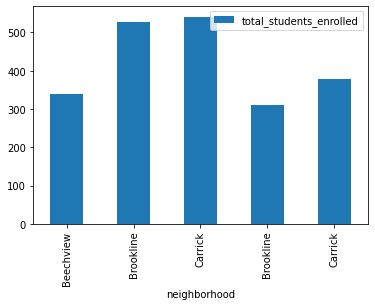

In [8]:
top3 = students['total_students_enrolled'] > 300
top3schools = enrollment[top3]

top3schools.plot(x='neighborhood', y='total_students_enrolled', kind='bar')

#### *Note

Repeats: The bar graph shows some bars with the same name on the x-axis but different height of the y-axis. This is because the data set organizes each neighborhood enrollment by grade-level (pre-K, elementary, middle, high)

Logically, if one specific school of a neighborhood has a higher number of students enrolled than the rest of the neighborhoods, then the total number of students enrolled from that neighborhood will automatically be a larger number than that of other neighborhoods. 

#### Results: Top Three Schools

1. Carrick
2. Brookline
3. Beechview

## Conclusion

We concluded that Beechview was the greatest neighborhood to live in after combining all of our data. Even though it wasn't anyone's first choice neighborhood, it had the lowest crime rate, the highest enrollment in schools, and the greatest number of parks when we looked at all of our data combined.

#### Suzette's Conclusion: Environment

Personally, I think the Strip District is my favorite neighborhood. This is not the same as Beechview, which was our "best" neighborhood to raise a family in. I believe that the data led us to select Beechview because it is more suburban, which implies that there are more parks and that crime rates are generally lower in suburban areas. Additionally, because it is a suburban neighborhood, there are more students enrolled in schools. My favorite area is the Strip District because of its stores and close proximity to the city center. But I do believe that Beechveiw would be the ideal neighborhood if I were older and intended to start a family. 

#### Aileen's Conclusion: Safety
Even though Beechview had about 26 crimes reported in the 30-day period, it had the least amount of crimes of our combined top contenders. Being from Texas, I am not very familiar with the Pittsburgh neighborhoods but I love Target so I would say that Shadyside is my favorite neighborhood. However, since our combined data does not take Target into consideration, it makes sense that a neighborhood with many playgrounds, bigger schools, and little crim would be the best neighborhood to raise a family in. 

#### Adelle's Conclusion: Education

Although Beechview was not the school with the most students enrolled, it ended up being the best neighborhood to raise a family in. We selected Beechview because it had multiple playgrounds, was one of the neighborhoods with the largest number of students enrolled, and had a smaller amount of crime cases than other neighborhoods in Pittsburgh. It would have been more accurate to include the population statistics of each neighborhood, but the data sets were already detailed with other factors that did not have an exact population metric. Overall, there are neighbrhoods that are either safer, have better education, or have a better environment, but Beechview is a great balance between all three. 